In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

# <span style="color:red">Basic Tasks</span>

# Task: floating point operation

- Question: The following loop will hang your notebook if you execute it. Why? <font color=red bold=True>**Try to figure out the answer without executing the code.**</font>

In [5]:
# Try to modify the following code to generate expected behavior.
# WARNING: By default, this code will hang your notebook!
fp = 0.0
while fp != 1.0:
    fp = fp + 1

In general, you should not try to check for exact equivalence (==) with floats. Instead, you can measure approximate equivalence.

Also, be careful about adding very small increments to a large-magnitude number. If you continuously add a small amount to a large float, you'll notice that the float eventually stops changing at all:

In [6]:
x = 10.0**200 # 10 to the power of 200
y = x + 1
if x == y:
    print("x is still the same as y")

x is still the same as y


- Question 1: True or False? For all floating point numbers x, y, z, (x + y) + z == x + (y + z)
- Question 2: True or False? For all floating point numbers a, b, c, a * (b + c) == a * b + a * c

For each case, provide counter-examples if the statement is false.

In [7]:
# Question 1
x = None # Your answer here.
y = None # Your answer here.
z = None # Your answer here.

In [8]:
# Question 1 Sample solution
# Here, the small magnitude of 498 relative to 1e100 makes the 498 disappear in x+y:
x = 498
y = 1e100
z = -1e100

In [9]:
assert (x + y) + z != x + (y + z), "Incorrect counter-example: LHS equals RHS"
print("Good counter-example!")

Good counter-example!


In [10]:
# Question 2
a = None # Your answer here.
b = None # Your answer here.
c = None # Your answer here.

In [11]:
# Question 2 Sample solution
a = 100
b = 0.1
c = 0.2

In [12]:
assert a * (b + c) != a * b + a * c, "Incorrect counter-example: LHS equals RHS"
print("Good counter-example!")

Good counter-example!


If the last example is confusing, notice that these
are not equivalent in Python's floating point representation:

In [13]:
if .3 != .1 * 3:
    print("Floating point numbers are weird.")

Floating point numbers are weird.


For more information about these quirks, please read: https://docs.python.org/3/tutorial/floatingpoint.html

# Task: Basic Operations

**Description**: Let's say you have two numpy arrays `a` and `b`, who has the same shape of `(d,)`. 
1. How can we find the element-wise multiplication of `a` and `b`?
2. How can we raise each element of `a` to the power of the corresponding element in `b`?
3. etc.

In [14]:
a = np.array([1,2,3])
b = np.array([4,5,6])

**Solution**: Take a look at the following cell

In [15]:
a_mul_b = a * b
a_plus_b = a + b
a_minus_b = a - b
a_div_b = a / b
a_pow_b = a ** b

In the previous cell:
  * `a_mul_b` is the element-wise multiplication of `a` and `b`.
  * `a_plus_b` is the element-wise summation of `a` and `b`.
  * `a_minus_b` is the element-wise subtraction of `a` and `b`.
  * `a_div_b` is the element-wise division of `a` and `b`.
  * `a_pow_b` is the element-wise $a_i^{b_i}$ operation.

# Task: Element-wise Array Functions

**Question**: Can you evaluate this equation element-wise for a given array `a`?

$$f(a_i) = \log (\frac{a_i}{10-a_i}) + \sin(a_i)$$

**Answer**: Take a look at the following cell.

In [16]:
a = np.array([1,2,3])
f = np.log(a/(10-a)) + np.sin(a)
f

array([-1.35575359, -0.47699693, -0.70617785])

# Task : left multiply a matrix with a diagonal matrix

**description:** assume a numpy array `A` with shape `(n,m)` is given as well as a numpy array `a` with shape `(n,)`. We want to find a matrix `B` such that 
$$ B = \left [ \begin{matrix}
a_1 & 0 & \dots & 0 \\
0 & a_2 & \dots & 0 \\
\vdots & \vdots & \ddots & 0 \\
0 & 0 & \dots & a_n 
\end{matrix}
\right] 
\times A,
$$
where $a_1, \dots, a_n$ are the elements in `a`.

Write a function `diag_left_mult` which takes the two arrays `a` and `A` as above and returns the matrix `B`.

**Note** that `a` is not a diagonal matrix, it is a one dimensional array.


In [17]:
def diag_left_mult(a, A):
    return np.diag(a) @ A
    # your code here

## Solution 1

Given array `a`, we can use the `np.diag` function to form a diagonal matrix and multiply it by $A$ from the left.

In [18]:
def diag_left_mult(a,A):
    
    a_diag = np.diag(a)
    
    return a_diag @ A

**Note** that we have used the `@` operator for matrix multiplication.

In [19]:
a = np.array([1,2])
A = np.array([[1,2],[3,4]])
diag_left_mult(a,A)

array([[1, 2],
       [6, 8]])

## Solution 2

We can use the broadcasting concept! Why do you think the following solution works?

Hints:

https://numpy.org/doc/stable/user/basics.broadcasting.html

https://numpy.org/doc/stable/reference/generated/numpy.reshape.html

In [20]:
def diag_left_mult(a,A):
    return a.reshape(-1, 1) * A

In [21]:
a = np.array([1,2])
A = np.array([[1,2],[3,4]])
diag_left_mult(a,A)

array([[1, 2],
       [6, 8]])

The -1 argument with reshape will act as a wildcard
for the appropriate number of missing dimensions.
In this case, `a.reshape(-1, 1)` is the same as `a.reshape(2, 1)`.

In [22]:
print("Shape of a.reshape(2, 1):", a.reshape(2, 1).shape)
print("Shape of a.reshape(-1, 1):", a.reshape(-1, 1).shape)
print("Result of a.reshape(-1, 1):\n", a.reshape(-1, 1))

Shape of a.reshape(2, 1): (2, 1)
Shape of a.reshape(-1, 1): (2, 1)
Result of a.reshape(-1, 1):
 [[1]
 [2]]


The result of `a.reshape(-1, 1)` is a 2D array that has a single column. When you do `a.reshape(-1, 1) * A`, the broadcasting rules of the `*` operator are matching a row on the left (a single value, in this case) with the same row of `A` on the right, and performing scalar multiplication across the row. Thus, the final result is $$1\cdot[1,2]$$ for the top row and $$2\cdot[3,4]$$ for the bottom row.

To conclude this part, please observe the similarities and differences between these three results:

In [23]:
# This will scale the columns of the right-hand side:
np.array([2,3]) * np.array([[1,1],[1,1]])

array([[2, 3],
       [2, 3]])

In [24]:
# This will also scale the columns of the right-hand side:
np.array([[2,3]]) * np.array([[1,1],[1,1]])

array([[2, 3],
       [2, 3]])

In [25]:
# This will scale the rows of the right-hand side:
np.array([[2],[3]]) * np.array([[1,1],[1,1]])

array([[2, 2],
       [3, 3]])

# Task : Geometric Mean of an array

**Description** Assume that you have a numpy array `a` with shape `(d,)`, how can we find the geometric mean of the elements in `a`? Remember that if the elements of `a` are $(a_1, \dots, a_d)$, the arithmetic mean is $\sqrt[n]{a_1 \times \dots \times a_d}$.

Write a function called `geom_mean` which does this:

**input:** a numpy array `a` with shape `(d,)`. Do not assume anything about `d` other than it is a positive integer. Also, do not assume anything about the elements of `a` other than they are postiive values.

**output:** a single value, which is the the geometric mean of the elements in `a`.

In [27]:
def geom_mean(a):
    d = a.shape[0]
    prod = np.prod(a)
    return prod ** (1./d)
    # your code here

## First solution

We can use the `np.prod` function (see the documentation [here](https://numpy.org/doc/stable/reference/generated/numpy.prod.html)) to compute the product of the elements in `a` and then use the `**(1/d)` operation to take the root.

In [30]:
def geom_mean(a):
    d = a.shape[0]
    prod = np.prod(a)
    return prod**(1./d)

In [31]:
a = np.array([1,2,3])
geom_mean(a)

1.8171205928321397

## Second Solution

We can first take the log of the elements in `a`, take their mean, and use the `exp` function to find the geometric mean. The reason is that:

$$ \sqrt[d]{a_1 \times \dots \times a_d} = \exp\left( \frac{1}{n}\Bigg(\log(a_1) + \log(a_2) + \dots + \log(a_d) \Bigg) \right).$$

In [32]:
def geom_mean(a):
    return np.exp(np.mean(np.log(a)))

In [33]:
a = np.array([1,2,3])
geom_mean(a)

1.8171205928321397

# Task : adjusting the elements in a matrix

**description** Given a numpy array `A` with shape `(n,m)`, we want to generate another matrix `B` with the same shape such that 

$$B_{i,j} = A_{i,j} * i / j \qquad 1 \leq i \leq n, 1 \leq j \leq m.$$

For instance, if 

$$ A = \left[ \begin{matrix}
3 & 2 & 1 \\
6 & 5 & 4 
\end{matrix}
\right ],$$

then 

$$ B = \left [ \begin{matrix}
3 \times 1 / 1 & 2 \times 1 / 2 & 1 \times 1 /3 \\
6 \times 2 / 1 & 5 \times 2 / 2 & 4 \times 2 / 3
\end{matrix} \right ]
= 
\left[
\begin{matrix}
3 & 1 & 0.33 \\
12 & 5 & 2.66 
\end{matrix}
\right].$$

Write a function `matrix_manipulate_1` which takes a numpy array `A` as above, and outputs a numpy array `B` as above. Do not assume anything about the dimensions `n` and `m` other than they are positive integers.

In [34]:
def matrix_manipulate_1(A):
    (n, m) = A.shape
    row_multipliers = (1+np.arange(n)).reshape(-1,1)
    column_divisors = (1+np.arange(m)).reshape(1,-1).astype(np.float64)
    B1 = A * row_multipliers
    B = B1 / column_divisors
    # your code here

## Solution

We are going to use the broadcasting concept. We create two useful numpy arrays: `row_multipliers` is a column array with shape `(n,1)` consisting of the elements `1,2,...,n`, and `column_divisors` is a row array with shape `(1,m)` consisting of the elements `1,2,...,m`. We use `np.arange` function to create these arrays. Note that since $i$ and $j$, the row and column indices, start from 1 in the above description, we need to add `1` to the output of `np.arange`. Finally, the answer is simply `(A * row_multipliers) / column_divisors` (verify that for yourself).

In [35]:
def matrix_manipulate_1(A):
    
    (n,m) = A.shape
    row_multipliers = (1+np.arange(n)).reshape(-1,1)
    column_divisors = (1+np.arange(m)).reshape(1,-1).astype(np.float64)
    B1 = A * row_multipliers
    B = B1 / column_divisors
    return B

In [36]:
A = np.array([[3,2,1],[6,5,4]])
matrix_manipulate_1(A)

array([[ 3.        ,  1.        ,  0.33333333],
       [12.        ,  5.        ,  2.66666667]])

**question** does changing the order of multiplication and division affect the output?

## Task: NumPy basic indexing

NumPy indexing comes in two forms: basic and advanced indexing. Basic indexing involves selecting specific elements in arrays and slicing arrays. Advanced indexing involves using indexing arrays to select the elements that you want. In the following three tasks, we will look at the indexing features that tend to be useful in machine learning applications. For more information on indexing, see https://numpy.org/doc/stable/reference/arrays.indexing.html

**Description**: Select the top 5 elements of list $x$ in a single line of code. Return a NumPy array of shape (5,) containing these elements.

**Hint 1**: Use np.sort, negative indexing, and slicing

**Hint 2**: np.sort will rearrange $x$ from least to greatest

In [40]:
def top_five(x):
    # your code here
    output = np.sort(x)[-5:]
    return output

### Test case

In [41]:
np.random.seed(1)
A = np.arange(100)
np.random.shuffle(A)  # shuffle in place

In [42]:
assert np.all(np.sort(top_five(A)) == np.array([95,96,97,98,99])), 'Incorrect!'

### Solution

In [43]:
def top_five(x):
    # your code here
    output = np.sort(x)[-5:]
    return output

assert np.all(np.sort(top_five(A)) == np.array([95,96,97,98,99])), 'Incorrect!'

## Task: NumPy advanced indexing 1 (integer indexing)

**Description**: Shuffle an input dataset $X$ (NumPy array of shape (N,28,28)) and the labels $y$ (NumPy array of shape (N,)). The outputs should be NumPy arrays with the same shape as the inputs.

**Note**: To shuffle a dataset means to randomly reorder the data points in the dataset.

**Hint**: Use np.random.shuffle and integer indexing.

In [54]:
def shuffle_dataset(X, y):
    # your code here
    order = np.arange(X.shape[0])
    np.random.shuffle(order)
    
    shuffled_X = X[order]
    shuffled_y = y[order]
    
    return shuffled_X, shuffled_y

### Test case

In [57]:
np.random.seed(1)
A = np.random.randn(100, 28, 28)
b = np.random.randint(0, 10, size=100)

In [56]:
shuffled_A, shuffled_b = shuffle_dataset(A, b)
assert (shuffled_A.argmax() == 44718) and (shuffled_b.argmax() == 5), 'Incorrect!'

### Solution

In [58]:
def shuffle_dataset(X, y):
    # your code here
    order = np.arange(X.shape[0])
    np.random.shuffle(order)
    
    shuffled_X = X[order]
    shuffled_y = y[order]
    
    return shuffled_X, shuffled_y

In [59]:
shuffled_A, shuffled_b = shuffle_dataset(A, b)
assert (shuffled_A.argmax() == 44718) and (shuffled_b.argmax() == 5), 'Incorrect!'

# Task: Adjacent Summations 

**description** Assume that `a` is a numpy array with shape `(n,)`. Construct a numpy array `b` with the same shape such that

```
b[0] = a[1] 
b[i] = a[i-1] + a[i+1] for 1 <= i <= n-2
b[n-1] = a[n-2]
```

See the following image for an example:

![example](adjacent_indices.png)

Write a function `sum_adjacent` that inputs `a` and returns `b` as explained above.

In [60]:
def sum_adjacent(a):
    b = np.zeros_like(a)
    b[:-1] == a[1:]
    b[1:] += a[:-1]
    return b
    # your code here

## Solution

In [61]:
def sum_adjacent(a):
    b = np.zeros_like(a)
    b[:-1] += a[1:]
    b[1:] += a[:-1]
    return b

In [62]:
a = np.array([1,2,1,1,0])
print(sum_adjacent(a))

[2 2 3 1 1]


# Task : Subtracting geometric mean from the rows of a matrix

**description:** assume that we have a numpy array `A` with shape `(n,m)` consisting of positive entries. We want to subtract all the elements in each row of `A` by the geometric mean of the elements in that row. For instance, if we have 

$$ A = \left[\begin{matrix}
a_{1,1} & a_{1,2} & a_{1,3} \\
a_{2,1} & a_{2,2} & a_{2,3}
\end{matrix}\right],
$$

then we want to calculate the output matrix $B$ where

$$ B = \left[\begin{matrix}
a_{1,1} - g_1 & a_{1,2}-g_1 & a_{1,3}-g_1 \\
a_{2,1}-g_2 & a_{2,2}-g_2 & a_{2,3}-g_2
\end{matrix}\right],
$$

where

$$ g_1 = \sqrt[3]{a_{1,1} a_{1,2} a_{1,3}} \qquad g_2 = \sqrt[3]{a_{2,1} a_{2,2} a_{2,3}}, $$

are the geometric means of the elements in each row of $A$.

Write a function `subtract_geom_mean` which does this.

**input:** a numpy array `A` of shape `(n,m)` consisting of positive values. Do not assume anything about `n` and `m` other than they are positive integers. 

**output:** a numpy array with the same shape `(n,m)` as we discussed above.

In [63]:
def subtract_geom_mean(A):
    # your code here:
    m = A.shape[1]
    g = np.exp(np.mean(np.log(A), axis=1)).reshape(-1,1)
    return A - g

## Solution

We can create a column array `g` which consists of the geometric means in each row. In order to do this, using the idea from the previous task, we can take the `log` from the matrix, take the average in each row, and use `exp` function to get the geometric means. Then, employing the broadcasting concept, the result is essentially `A-g`.

In [64]:
def subtract_geom_mean(A):
    m = A.shape[1] # the number of columns
    g = np.exp(np.mean(np.log(A),axis=1)).reshape(-1,1)
    return A - g

In [65]:
A = np.array([[1,2,3],[4,5,6]])
subtract_geom_mean(A)

array([[-0.81712059,  0.18287941,  1.18287941],
       [-0.93242415,  0.06757585,  1.06757585]])

## Task: Arg sort

**Description**: Sorting is an important technique for anyone getting into machine learning and Python. Imagine a common scenario where a problem requires an array to be sorted based on another array, such as ordering flavors of ice cream based on a score from least to greatest. Here are the ice cream and their scores, in no particular order.

Vanilla - 7

Chocolate - 8

Strawberry - 6

Chocolate chip - 3

Double chocolate - 4

Green tea - 10

There are a variety of tools you can use, but one important function is **np.argsort**. In this task you will use np.argsort to rank the ice cream flavors!

In [68]:
def rank_ice_cream(names, scores):
    # your code here
    ranking = names[np.argsort(scores)]
    
    return ranking

In [69]:
scores = np.array([7, 8, 6, 3, 4, 10])
names = np.array(['Vanilla', 'Chocolate', 'Strawberry', 'Chocolate chip', 'Double chocolate', 'Green tea'])

ice_cream_ranking = rank_ice_cream(names, scores)

print("This is the ranking of ice cream from lowest to highest score!")
print(ice_cream_ranking)

This is the ranking of ice cream from lowest to highest score!
['Chocolate chip' 'Double chocolate' 'Strawberry' 'Vanilla' 'Chocolate'
 'Green tea']


# Solution

In [70]:
def rank_ice_cream(names, scores):
    # your code here
    ranking = names[np.argsort(scores)]
    
    return ranking

# Task: Manipulating Tensor data

Let's start with some raw data in the form of a list of lists and convert that to a numpy array. We'll then do various operations on the resulting tensor.

In [71]:
raw_data = [[5.3, 3.1, 1, 7, 8.3], [3, 5, 6.3, 4, 45], [99, 1, 101.2, 2., 0.2], [0., 0, 1., 22, 44.]]
data = np.array(raw_data).astype(np.float32)

print(type(data))   
print(data.dtype)  
print(data)

<class 'numpy.ndarray'>
float32
[[  5.3   3.1   1.    7.    8.3]
 [  3.    5.    6.3   4.   45. ]
 [ 99.    1.  101.2   2.    0.2]
 [  0.    0.    1.   22.   44. ]]


**Question 1.** Double the values stored in even-numbered rows (0, 2, 4, 6 ...)

In [72]:
# we can do this using the double-colon (::) Numpy syntax and the multiplication-assignment operator 
data[::2, :] *= 2
print(data)

[[ 10.6   6.2   2.   14.   16.6]
 [  3.    5.    6.3   4.   45. ]
 [198.    2.  202.4   4.    0.4]
 [  0.    0.    1.   22.   44. ]]


**Question 2.** Reverse the sequences in odd-numbered columns (1, 3, 5, 7 ...)

In [73]:
# we can do this using the double-colon (::) Numpy syntax. Specifically, ::-1 is used to reverse a sequence
data[:, 1::2] = data[:, 1::2][::-1, :]
print(data)    # notice the change in two of the columns of our data tensor

[[ 10.6   0.    2.   22.   16.6]
 [  3.    2.    6.3   4.   45. ]
 [198.    5.  202.4   4.    0.4]
 [  0.    6.2   1.   14.   44. ]]


**Question 3.** Add a new axis to the tensor

In [74]:
# there are a few ways to achieve this. Two of the methods are using 'None' and np.newaxis.
print(data.shape)
data_shape_expand_none = data[None]
data_shape_expand_newaxis = data[np.newaxis]
print(data_shape_expand_none.shape)
print(data_shape_expand_newaxis.shape)

(4, 5)
(1, 4, 5)
(1, 4, 5)


In [75]:
# this can work for adding a new axis along any dimension.
print(data.shape)
data_shape_expand_none = data[:, None]
data_shape_expand_newaxis = data[:, np.newaxis]
print(data_shape_expand_none.shape)
print(data_shape_expand_newaxis.shape)

(4, 5)
(4, 1, 5)
(4, 1, 5)


In [76]:
# numpy API has methods np.atleast_{1d/2d/3d} to create arrays of atleast that shape. For instance, with np.atleast_3d, a 1-D array of shape (N,) becomes a view of shape (1, N, 1), and a 2-D array of shape (M, N) becomes a view of shape (M, N, 1)
one_d_arr = np.array([3.0, 4.0])
print(one_d_arr.shape)
three_d_arr = np.atleast_3d(one_d_arr)
print(three_d_arr.shape)

(2,)
(1, 2, 1)


**Question 4.** Permute the axes of a tensor

In [77]:
# we will use the np.transpose API for this operation. It allows for different permutations of axes
data_p = data[:, np.newaxis]
print("Shape of tensor before transpose {}".format(data_p.shape))
data_p = np.transpose(data_p, (2,0,1))
print("Shape of tensor after transpose {}".format(data_p.shape))

Shape of tensor before transpose (4, 1, 5)
Shape of tensor after transpose (5, 4, 1)


# Task: Array Stack

**Question**: How to stack two arrays **a** and **b** vertically?

In [78]:
a = np.arange(10).reshape(2,-1)
b = np.repeat(1, 10).reshape(2,-1)

**Solution**:

In [79]:
# Method 1:
np.concatenate([a, b], axis=0)

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]])

In [80]:
# Method 2:
np.vstack([a, b])

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]])

In [81]:
# Method 3:
np.r_[a, b]

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]])

**Question**: How to stack two arrays **a** and **b** horizontally?

In [82]:
a = np.arange(10).reshape(2,-1)
b = np.repeat(1, 10).reshape(2,-1)

**Solution**:

In [83]:
# Method 1:
np.concatenate([a, b], axis=1)

array([[0, 1, 2, 3, 4, 1, 1, 1, 1, 1],
       [5, 6, 7, 8, 9, 1, 1, 1, 1, 1]])

In [84]:
# Method 2:
np.hstack([a, b])

array([[0, 1, 2, 3, 4, 1, 1, 1, 1, 1],
       [5, 6, 7, 8, 9, 1, 1, 1, 1, 1]])

In [85]:
# Method 3:
np.c_[a, b]

array([[0, 1, 2, 3, 4, 1, 1, 1, 1, 1],
       [5, 6, 7, 8, 9, 1, 1, 1, 1, 1]])

# Tricks: useful commands in NumPy

- Matrix Multiply: `a.dot(b)`  is equivalent to  `a @ b`
- Matrix Transpose: `a.transpose()`  is equivalent to  `a.T`
- Add dummy dimension to expand the shape: `image = image[..., np.newaxis]`
- Initialize zero-arrays with the same shape of a: `x = np.zeros_like(a)` is equivalent to `x = np.zeros(a.shape())`
- ...

In [86]:
## Example 1
a = np.random.rand(3, 2)
b = np.random.rand(2, 3)
assert np.any(a.dot(b) == a @ b)

In [87]:
## Example 2
assert np.any(a.T == a.transpose())

In [88]:
## Example 3
img1 = np.random.rand(32, 32, 3)
img2 = np.random.rand(32, 32, 3)

movie = np.concatenate((img1[np.newaxis,:], img2[np.newaxis,:]), axis=0)
print(movie.shape)

(2, 32, 32, 3)


In [89]:
## Example 4
assert np.any(np.zeros(a.shape) == np.zeros_like(a))

# <span style="color:red">Advanced Tasks</span>

# Task: Selective Sum of Squares

**description:** Given two numpy arrays `a` and `b` with the same shape `(n,)`, we want to compute the following sum:

$$ S = \sum_{i=0}^{n-1} 1(a[i]>0.5) \times b[i]^2.$$

Here, $1(a[i]>0.5)$ is the indicator of $a[i] > 0.5$, i.e. $1(a[i]>0.5) = 1$ if $a[i] > 0.5$ and it is zero otherwise. Effectively, we want to find the sum of squares in `b` corresponding to places where `a` has value more than `0.5`. 

Write a function `selective_sum_squares` which takes the arrays `a` and `b` and returns $S$ as was defined above.

In [90]:
def selective_sum_squares(a,b):
    
    # your code here
    return ((a > 0.5) * (b**2)).sum()

## Solution 1

In [91]:
def selective_sum_squares(a,b):
    return ((a > 0.5) * (b**2)).sum()

In [92]:
a = np.array([1, 0.1, 0.5, 0.6])
b = np.array([1, 2  , 3  , 4])
print(selective_sum_squares(a,b))

17


## Solution 2

In [93]:
def selective_sum_squares(a,b):
    return np.where(a>0.5,b**2,0).sum()

In [94]:
a = np.array([1, 0.1, 0.5, 0.6])
b = np.array([1, 2  , 3  , 4])
print(selective_sum_squares(a,b))

17


## Task: NumPy advanced indexing 2 (Boolean indexing)

**Description**: Select the elements of the input data $X$ (NumPy array of shape (N,d)) whose Euclidean distance from the mean data point is *greater* than 1.5 times the average distance from the mean. Average distance from the mean is the average Euclidean distance from the mean data point, i.e. $$ \frac{1}{N}\sum_{i=1}^{N}\left\| X_i - \frac{1}{N}\sum_{j=1}^{N}X_j \right\|_2 $$ Return the sorted NumPy array of shape (K,d) containing these elements.

**Hint 1**: Use np.linalg.norm, np.std, and Boolean indexing.

**Hint 2**: Find the distances first. Then find the distances that are greater than twice the mean distance.

In [95]:
def select_outliers(X):
    # your code here
    distances = np.linalg.norm(X - X.mean(0), axis=1)
    outlier_boolean = distances > 1.2 * distances.mean()
    outliers = X[outlier_boolean]
    return outliers

### Solution

In [96]:
def select_outliers(X):
    # your code here
    distances = np.linalg.norm(X - X.mean(0), axis=1)
    outlier_boolean = distances > 1.2 * distances.mean()
    outliers = X[outlier_boolean]
    
    return outliers

### Visualization

In [97]:
np.random.seed(1)
A = np.random.randn(10000,10)

outliers = select_outliers(A)

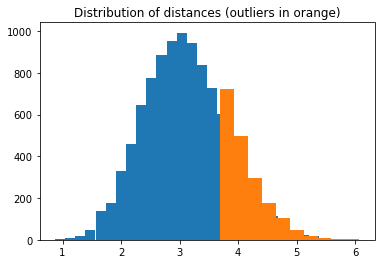

In [98]:
plt.figure()
plt.hist(np.linalg.norm(A - A.mean(0), axis=1), bins=30)
plt.hist(np.linalg.norm(outliers - A.mean(0), axis=1))
plt.title('Distribution of distances (outliers in orange)')
plt.show()

In [99]:
# Don't remove this cell. It gives you a full score on the assignment.
assert True